In [80]:
import pandas as pd
import numpy as np
import seaborn as sns

Upload data

In [2]:
df = pd.read_csv('My Uber Drives - 2016.csv')

In [3]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


Rename columns

In [4]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.head()

,start_date*,end_date*,category*,start*,stop*,miles*,purpose*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   start_date*  1156 non-null   object 
 1   end_date*    1155 non-null   object 
 2   category*    1155 non-null   object 
 3   start*       1155 non-null   object 
 4   stop*        1155 non-null   object 
 5   miles*       1156 non-null   float64
 6   purpose*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


## Delete rows

In [8]:
df.drop([df.index[1155]], inplace = True )

Null values

In [9]:
df.isna().mean()

start_date*    0.000000
end_date*      0.000000
category*      0.000000
start*         0.000000
stop*          0.000000
miles*         0.000000
purpose*       0.434632
dtype: float64

 We have 40% blank values in Purpose column


In [10]:
len(df)

1155

In [11]:
df['purpose*'] = df['purpose*'].fillna('no_info')

Pivot table

In [12]:
(df.groupby(['purpose*'])['miles*'].agg(['mean', 'median']).sort_values('mean', ascending=False))

,mean,median
purpose*,,
Commute,180.200000,180.20
Customer Visit,20.688119,7.90
Meeting,15.247594,10.00
Charity ($),15.100000,15.10
Between Offices,10.944444,11.60
Temporary Site,10.474000,8.00
no_info,9.748008,5.00
Meal/Entertain,5.698125,4.25
Airport/Travel,5.500000,4.80


##### The highest average miles were driven for Commute purposes

In [13]:
(df.groupby(['category*'])['miles*'].agg(['mean', 'median']))

,mean,median
category*,,
Business,10.655844,6.1
Personal,9.320779,4.2


##### People tend to travel more miles for Business reason

In [14]:
df.head()

,start_date*,end_date*,category*,start*,stop*,miles*,purpose*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,no_info
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


# Descriptive Analysis

### Trip length analysis

In [15]:
df['miles*'].agg(['mean', 'median'])

mean      10.56684
median     6.00000
Name: miles*, dtype: float64

In [16]:
df['end_date*'] = pd.to_datetime(df['end_date*'])

In [17]:
df['start_date*'] = pd.to_datetime(df['start_date*'])

In [18]:
df['duration_min'] = (df['end_date*'] - df['start_date*']).astype('timedelta64[m]')

In [19]:
#df.drop(['duration', 'duration1'], axis = 1, inplace = True)

In [20]:
df

,start_date*,end_date*,category*,start*,stop*,miles*,purpose*,duration_min
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,no_info,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0
...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0


In [21]:
df.describe()

,miles*,duration_min
count,1155.000000,1155.000000
mean,10.566840,23.243290
std,21.579106,27.318277
min,0.500000,0.000000
25%,2.900000,10.000000
50%,6.000000,16.000000
75%,10.400000,27.500000
max,310.300000,336.000000


In [22]:
df['start*'] = df['start*'].replace({"\?": "a"}, regex=True)
df['stop*'] = df['stop*'].replace({"\?": "a"}, regex=True)

### Number of rides per month of the year

In [23]:
df['month'] = pd.DatetimeIndex(df['start_date*']).month

In [24]:
df['week'] = df['start_date*'].dt.strftime('%U')

In [25]:
df['week'] = df['week'].astype(str).astype(int)

In [26]:
df.dtypes

start_date*     datetime64[ns]
end_date*       datetime64[ns]
category*               object
start*                  object
stop*                   object
miles*                 float64
purpose*                object
duration_min           float64
month                    int64
week                     int32
dtype: object

In [27]:
(df.groupby(['month'])['miles*'].agg(['mean', 'median']).sort_values('month', ascending=True))

,mean,median
month,,
1,8.408197,5.50
2,7.897391,6.10
3,14.990265,6.60
4,20.611111,8.80
5,7.424490,6.10
6,7.803704,7.25
7,10.933929,7.10
8,10.041353,5.70
9,16.716667,9.70


<AxesSubplot:xlabel='month'>

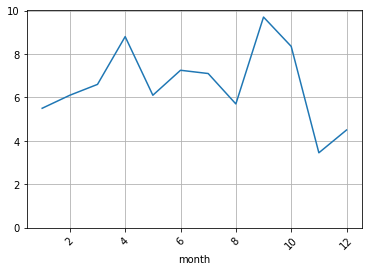

In [28]:
df.groupby('month')['miles*'].median().plot(rot=45,ylim=0,grid=True)

#### The longest miles were travelled in April, September and October

In [29]:
(df.groupby(['month'])['duration_min'].agg(['mean', 'median']).sort_values('month', ascending=True))

,mean,median
month,,
1,18.295082,14.0
2,19.695652,17.0
3,25.743363,16.0
4,31.907407,19.0
5,14.612245,12.0
6,20.055556,17.5
7,21.589286,17.0
8,24.984962,18.0
9,46.166667,19.0


<AxesSubplot:xlabel='month'>

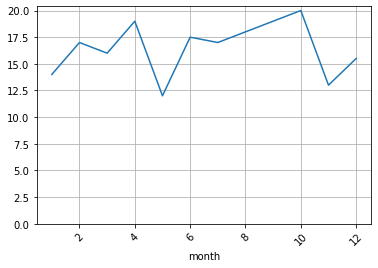

In [30]:
df.groupby('month')['duration_min'].median().plot(rot=45,ylim=0,grid=True)

### Number of rides by month

In [76]:
df['month'].value_counts()

12    146
8     133
11    122
2     115
3     113
7     112
6     108
10    106
1      61
4      54
5      49
9      36
Name: month, dtype: int64

###### Most number of rides were in month of December (all of them were Business trips)
###### Top 5 months having most trips were: December,August,November,February & March.
###### Uber Ride was used at Feb,Mar,Jul,Jun & Apr for personal trips.

<AxesSubplot:xlabel='month', ylabel='count'>

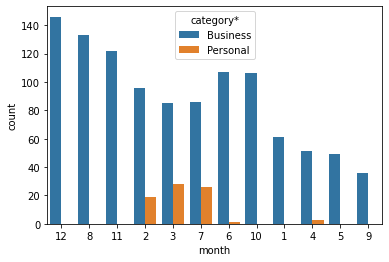

In [94]:
sns.countplot(x='month',data=df,order=pd.value_counts(df['month']).index,hue='category*')

### Time and duration of rides correlation

In [31]:
df['start_time'] = pd.DatetimeIndex(df['start_date*']).time

In [99]:
df['hour'] = pd.to_datetime(df['start_date*']).dt.hour

In [102]:
#df

<AxesSubplot:xlabel='hour', ylabel='count'>

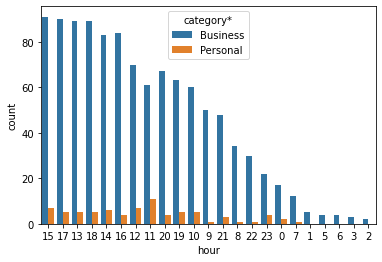

In [100]:
sns.countplot(x='hour',data=df,order=pd.value_counts(df['hour']).index,hue='category*')

#### The maximum number of trips were in the evening (at 17 - 18:00) and in the afternoon (between 13 - 15 :00)

In [105]:
by_week = (df.groupby(['week'])['miles*'].agg(['mean', 'median']).sort_values('week', ascending=True))
by_week.head()

,mean,median
week,,
0,4.966667,5.00
1,16.120000,4.70
2,7.531818,6.95
3,10.170000,6.00
4,7.142857,5.50


<AxesSubplot:xlabel='week'>

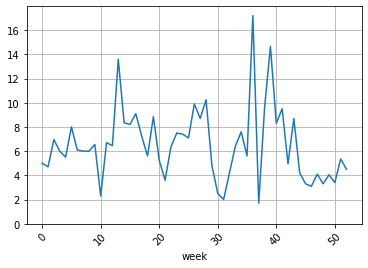

In [34]:
df.groupby('week')['miles*'].median().plot(rot=45,ylim=0,grid=True)

#### A spike is observed on 36th week where median miles travelled were 17.2. (next step is to find out why on 36th week was spike while on 10, 31, and 37 weeks were decline

### Rides by day of the week

In [86]:
df['week_day'] = df['start_date*'].dt.day_name()

In [87]:
df['week_day'].value_counts()

Friday       206
Tuesday      176
Monday       174
Thursday     154
Saturday     150
Sunday       148
Wednesday    147
Name: week_day, dtype: int64

<AxesSubplot:xlabel='week_day', ylabel='count'>

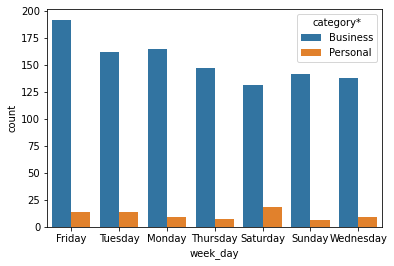

In [88]:
sns.countplot(x='week_day',data=df,order=pd.value_counts(df['week_day']).index,hue='category*')

#### FRIDAY was the day at which uber rides were mostly used

### Top pick up places

In [49]:
len(df['start*'].unique())

175

In [56]:
top10 = df.groupby("start*")["start*"].count().sort_values(ascending=False).head(10)

In [58]:
top10

start*
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Karachi              31
Raleigh              28
Apex                 17
Name: start*, dtype: int64

<AxesSubplot:title={'center':'Top 10 Pickup places'}, ylabel='Pickup Count'>

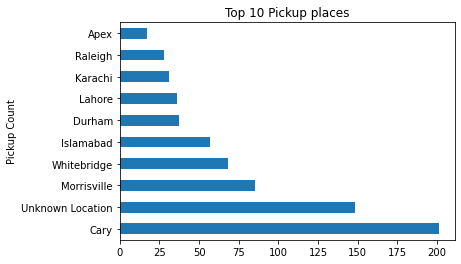

In [60]:
df['start*'].value_counts(ascending=False)[:10].plot(kind='barh',ylabel='Places',xlabel='Pickup Count',title='Top 10 Pickup places')

#### Cary is the most popular Starting point for this user

### Checking for round trips

In [64]:
def is_roundtrip(df):
    if df['start*'] == df['stop*']:
        return 'yes'
    else:
        return 'no'
    
df['round_trip'] = df.apply(is_roundtrip, axis=1)

In [70]:
df.groupby("round_trip")["round_trip"].count()/df['round_trip'].count()

round_trip
no     0.750649
yes    0.249351
Name: round_trip, dtype: float64

##### User mostly take single-trip Uber rides.
##### - Around 75% of the trips are one-way trips and 25% are Round-Trips

In [74]:
df

,start_date*,end_date*,category*,start*,stop*,miles*,purpose*,duration_min,month,week,start_time,round_trip
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,1,0,21:11:00,yes
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,no_info,12.0,1,0,01:25:00,yes
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,1,0,20:25:00,yes
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,1,1,17:31:00,yes
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,1,1,14:42:00,no
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting,7.0,12,52,01:07:00,yes
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site,18.0,12,52,13:24:00,no
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,12,52,15:03:00,yes
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,12,52,21:32:00,no
